Имеется список гипотез для увеличения выручки интернет-магазина. Необходимо приоритизировать гипотезы и запустить А/В-тест.

#1. ЗАГРУЗКА ДАННЫХ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

1.1. Предобработка таблицы hypothesis

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [61]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


1.2. Предобработка таблицы orders

In [62]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [63]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [64]:
#Поменяем тип столбца "date" на datetime
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [67]:
#Проверяем дубликаты
print(orders.duplicated().sum())

0


Все данные корректны, дубликатов нет и готовы к анализу. В процессе предобработки был поменян только тип столбца "date" на datetime.

1.3. Предобработка таблицы visitors

In [68]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [69]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [70]:
#Поменяем тип столбца "visitors" на datetime
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [71]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [72]:
#Проверим дубликаты
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


Все данные корректны, дубликатов нет, готовы к анализу. В процессе предобработки был поменян только тип столбца "date" на datetime.

#2. ПРИОРИТЕЗАЦИЯ ГИПОТЕЗ

In [73]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [74]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [75]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Хорошо видно различие в таблицах. Меняется тройка лидеров: в ICE это гипотезы с индексами 8, 0, 7 , в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); лидер таблицы ICE - 8 сместился на 5 позицию, в то время как 2 перешел на второе место с пятого. Такое отличие говорит о том, что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок. Поэтому надо предложить для тестирования гипотезу с индексом 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

#3. АНАЛИЗ A/B-ТЕСТА

3.1. График кумулятивной выручки

In [76]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
1057,562221532,2138044356,2019-08-11,990,A
362,1552043751,109615108,2019-08-06,2190,A
155,891673177,572335325,2019-08-01,3760,A


In [77]:
#Посчитаем усредненную выручку за день в каждой группе, чтобы иметь представление какая выручка за день
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [78]:
visitors.sample(3)

,date,group,visitors
7,2019-08-08,A,610
44,2019-08-14,B,746
54,2019-08-24,B,378


In [79]:
#Сравним идентичность даты и группы в таблицах посетителей и заказов
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [80]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_dg

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


In [81]:
compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

Все пары дата-группа в таблицах посетители и заказы совпадают

Создадим таблицу cumulativeData куммулятивных данных по обеим таблицам

In [82]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [83]:
duple = orders.groupby('visitorId').agg({'group':'nunique'}).query('group > 1').reset_index()
duple

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


Всего 58 человек попадают в 2 группы одновременно, удалим их

In [86]:
orders = orders.query('visitorId not in @duple')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


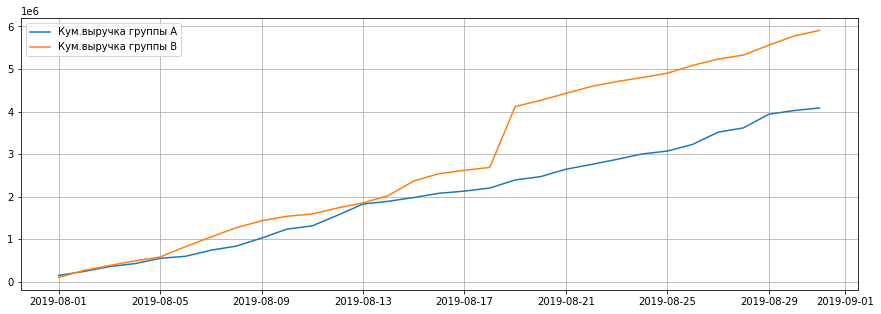

In [27]:
#построим графики выручки обеих групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.legend()

В первой половине месяца видно, что выручка в группе "B" растёт быстрее, чем в "A". 13 августа выручки примерно равны. Во второй половине месяца группа "B" лидирует, её выручка значительно больше. Надо отметить сильный всплеск выручки в группе "B" 19 августа, скорее всего это были крупные заказы.

Посмотрим какие заказы были 19 августа

In [26]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


Кол-во заказов 19 августа на равне с соседними днями

In [27]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


был один заказ №425 на 1,3 млн в группе "B" 19 августа - этот заказ принес около 30% дневной выручки; в то время как остальные заказы не больше 44 тысяч. Так как этот заказ один, его можно считать выбросом.

3.2. График кумулятивного среднего чека

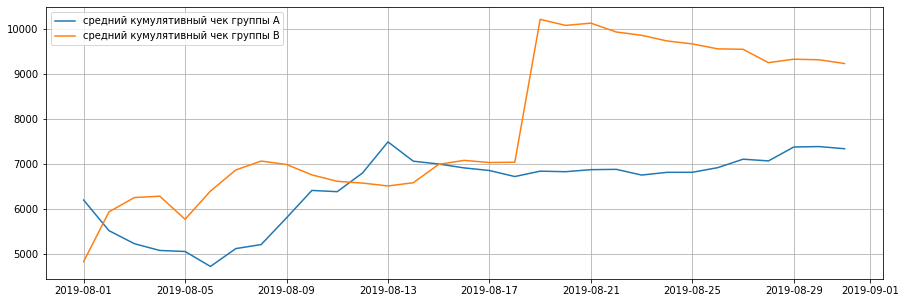

In [28]:
#разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.legend()

есть некоторая схожесть с графиком кум.выручки. В первой половине в группе "B" чек преимущественно больше, но есть даты где и наоборот - чек больше в "A" - это начало 1 августа и 12-14 августа. Далее чек группы "B" больше.

3.3. График относительного изменения кумулятивного среднего чека

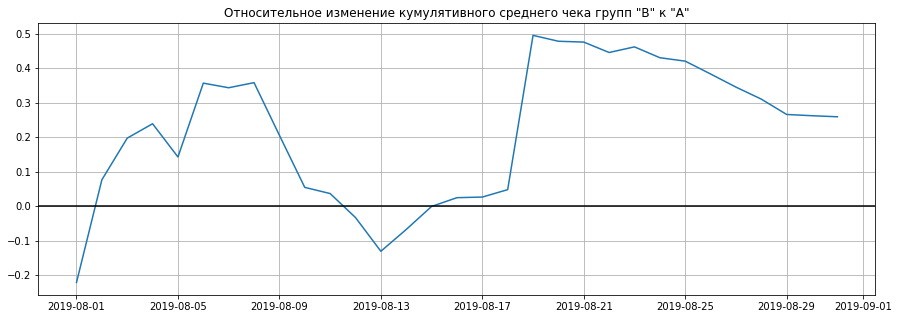

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='-')

Средний чек "B" рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, 3 дня 12-14 акгуста средний чек "A" был больше "B". C 13 чек "B" начал расти и 15 августа наступил переломный момент, на следующий день чек "B" оказался больше и находился больше "A" до конца месяца.

3.4. График кумулятивной конверсии

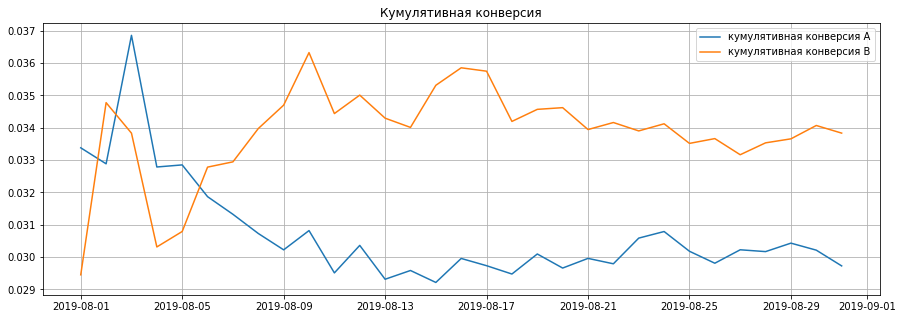

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия')
plt.legend()

С начала месяца конверсия 1-5 августа "A" была больше, 3 августа она была максимальной за весь период наблюдения между группами; затем последовало падение, начиная с 9 августа стагнировала на минимальном диапазоне 0,029-0,031. Конверсия группы "B" с 4 августа пошла расти и уже 6 августа превысила конверсию "A" и росла до 10 августа чуть выше 0,036; затем пошло постепенное снижение. Конверсия группы "B" значительно больше "A".

3.5. График относительного изменения кумулятивной конверсии

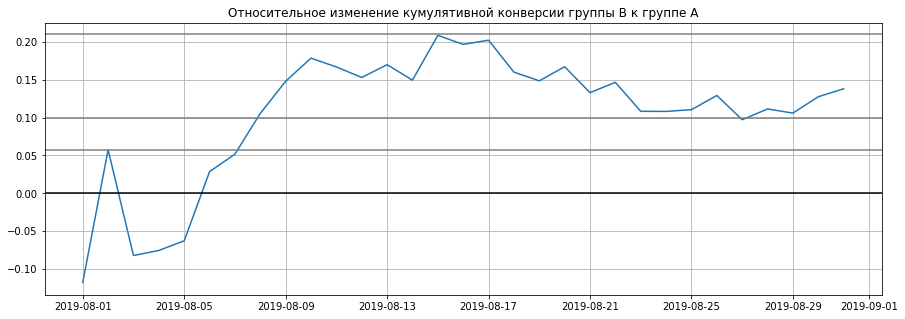

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='-') 
plt.axhline(y=0.1, color='grey', linestyle='-')
plt.axhline(y=0.21, color='grey', linestyle='-')
plt.axhline(y=0.057, color='grey', linestyle='-')

С 1 авгста по 5 конверсия в "A" была больше на 5-10%; исключение в этот период это 2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A". Начиная с 6 августа группа "B" лидировала до конца периода; её конверсия росла до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение отностельной конверсии до 10%-14%.

3.6. График количества заказов по пользователям

In [32]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
233,797272237,11685486,2019-08-23,6201,A
950,627172106,3074968175,2019-08-21,24350,B
343,1612463967,3891384992,2019-08-03,5870,A


In [33]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


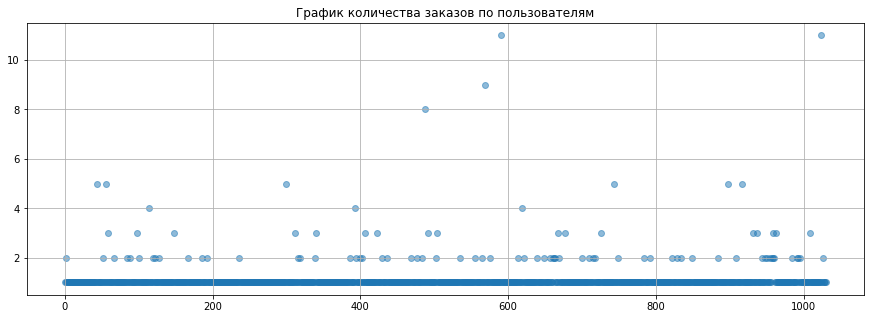

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)

Больше всего пользователей которые совершили 1 заказ. Тех кто совершили 2 заказа не так много. Тех, кто совершил 3 заказа совсем мало, все, что выше 3 заказов - скорее всего аномалия.

3.7. Граница заказов для определения аномальных пользователей

In [35]:
print('перцентили c 95 по 99 (по заказам) : ', np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 

перцентили c 95 по 99 (по заказам) :  [2. 2. 2. 3. 4.]


большинство пользователей делают 1 или 2 заказа. Всё что выше - это аномалия

3.8. График стоимостей заказов

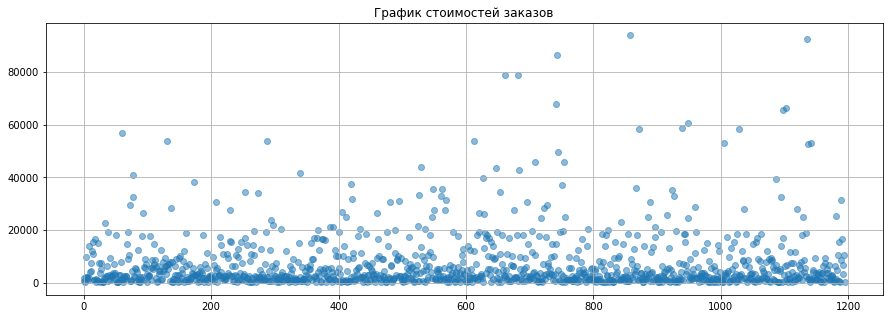

In [36]:
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, norm_orders, alpha=0.5);

видно аномальный заказ №425 на 1.3 млн и еще один на 200 тысяч, остальные примерно не больше 100 тысяч.

3.9. Граница для определения аномальных заказов (по выручке)

In [37]:
print('95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

95 и 99 перцентили по выручке заказов :  [28000.  58233.2]


установим в качестве границы для аномалий 58233.2.

3.10. Различия в конверсии между группами.

In [38]:
print(visitors.head(2))
print('---------')
print(orders.head(2))

        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
---------
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B


In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [40]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916
13,2019-08-14,24,64341,23,171708,268,1890852,308,2025446,735,746,9058,9056


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу отвергаем.

In [42]:
sampleA.value_counts() , sampleB.value_counts()

(0    18233
 1      473
 2       17
 3        7
 4        3
 5        2
 7        1
 Name: orders, dtype: int64,
 0    18330
 1      552
 2       23
 3        5
 4        4
 5        1
 6        1
 Name: orders, dtype: int64)

3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [43]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.
#За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


Не получилось отвергнуть нулевую гипотезу: Cтатистически значимых различий в среднем чеке между группами нет. P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Однако, относительное различие среднего чека между группами по «сырым» данным 26% - вероятно сказываются, ранее замеченный, аномально дорогой заказ 425.

3.12. Различия в конверсии между группами по «очищенным» данным

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего ненормальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего ненормальных пользователей = 31


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам,
За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [46]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу отвергаем. по «очищенным» данным различия в конверсии групп A и B есть.

3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [47]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


статистическая значимость достигнута не была. разница сократилась с 26% до практически нулевой, средний чек в группе B даже стал незначительно ниже чем в группе A.

# ОБЩИЙ ВЫВОД

По результатам тестирования было выявлено:
По "сырым" и по "очищенным" данным в конверсии групп A и B есть различия. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.

По "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался на 2% ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на 26%, - и всё из-за одного аномального заказа №425 на 1,3 млн. Когда аномальный заказ убрали, чеки сравнялись.

В итоге можно принять решение остановить тестирование и констатировать победу группы B : группа B значительно лучше группы A по конверсии, хотя по среднему чеку группы примерно равны.